In [ ]:
!pip install easyocr
!pip install imutils

In [2]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr

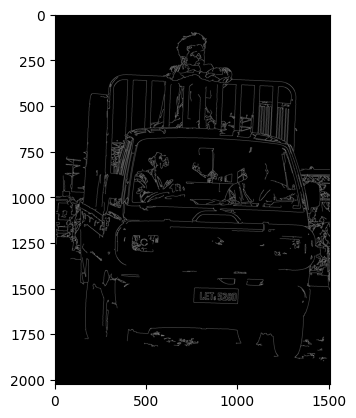

In [5]:
model = fasterrcnn_resnet50_fpn(pretrained=True)

In [6]:
model.eval()

In [7]:
ig = Image.open("/content/2.JPG")

array([[[ 763, 1499]],

       [[ 760, 1578]],

       [[ 999, 1583]],

       [[1001, 1504]]], dtype=int32)

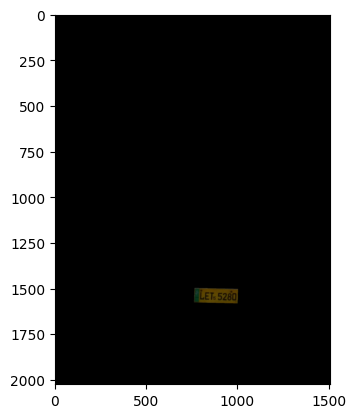

In [8]:
transform = T.ToTensor()
img = transform(ig)


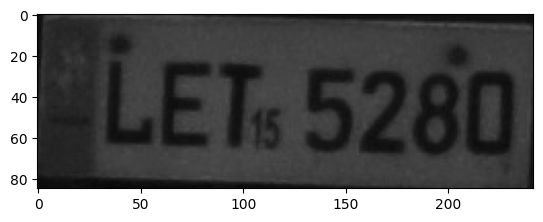

In [9]:
with torch.no_grad():
  pred = model([img])

In [ ]:
pred

In [ ]:
coco_names = ["person" , "bicycle" , "car" , "motorcycle" , "airplane" , "bus" , "train" , "truck" , "boat" , "traffic light" , "fire hydrant" , "street sign" , "stop sign" , "parking meter" , "bench" , "bird" , "cat" , "dog" , "horse" , "sheep" , "cow" , "elephant" , "bear" , "zebra" , "giraffe" , "hat" , "backpack" , "umbrella" , "shoe" , "eye glasses" , "handbag" , "tie" , "suitcase" ,
"frisbee" ,"numberplate", "skis" , "snowboard" , "sports ball" , "kite" , "baseball bat" ,
"baseball glove" , "skateboard" , "surfboard" , "tennis racket" , "bottle" ,
"plate" , "wine glass" , "cup" , "fork" , "knife" , "spoon" , "bowl" ,
"banana" , "apple" , "sandwich" , "orange" , "broccoli" , "carrot" , "hot dog" ,
"pizza" , "donut" , "cake" , "chair" , "couch" , "potted plant" , "bed" ,
"mirror" , "dining table" , "window" , "desk" , "toilet" , "door" , "tv" ,
"laptop" , "mouse" , "remote" , "keyboard" , "cell phone" , "microwave" ,
"oven" , "toaster" , "sink" , "refrigerator" , "blender" , "book" ,
"clock" , "vase" , "scissors" , "teddy bear" , "hair drier" , "toothbrush" , "hair brush"]

In [ ]:
pred[0].keys()

dict_keys(['boxes', 'labels', 'scores'])

In [ ]:
bboxes,labels,score = pred[0]["boxes"], pred[0]["labels"], pred[0]["scores"]

In [ ]:
num = torch.argwhere(score>0.8).shape[0]

In [ ]:
font = cv2.FONT_HERSHEY_SIMPLEX
igg = cv2.imread("/content/2.JPG")
for i in range(num):
  x1,y1,x2,y2 = bboxes[i].numpy().astype("int")
  class_name = coco_names[labels.numpy()[i]-1]
  igg = cv2.rectangle(igg,(x1,y1),(x2,y2),(0,255,0),1)
  igg = cv2.putText(igg,class_name,(x1,y1-10),font,0.5,(255,0,0),1,cv2.LINE_AA)

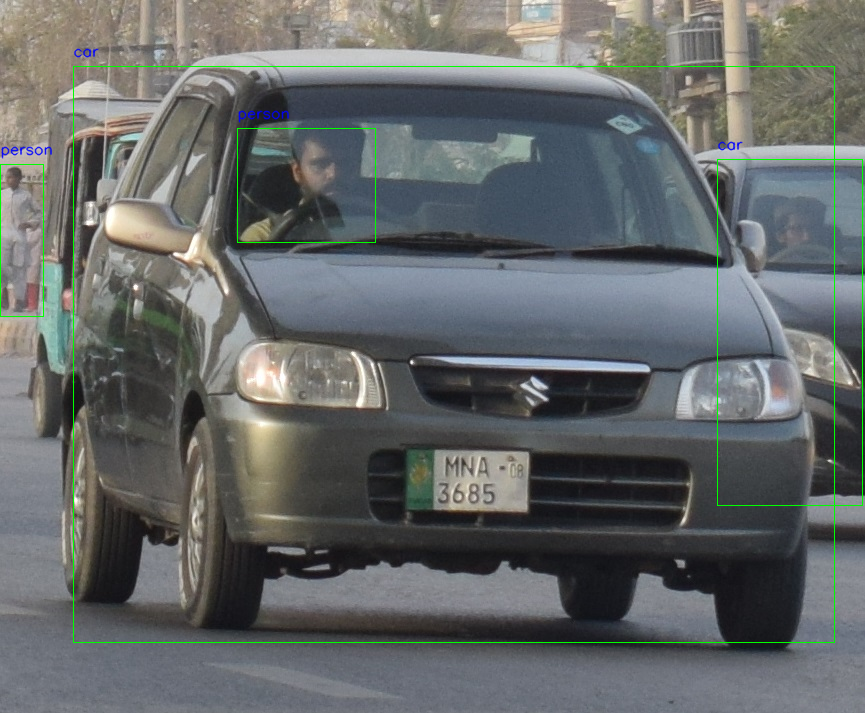

In [ ]:
cv2_imshow(igg)